In [1]:
pip install pandas


In [2]:
import pandas as pd

# Sample election results data (replace with actual data)
data = {
    'Constituency': ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C'],
    'Party': ['Party A', 'Party B', 'Party C', 'Party C', 'Party C', 'Party A', 'Party A', 'Party B', 'Party A'],
    'Candidate': ['Candidate X', 'Candidate Y', 'Candidate Z', 'Candidate P', 'Candidate Q', 'Candidate R', 'Candidate S', 'Candidate T', 'Candidate U'],
    'Votes': [15000, 12000, 18000, 13000, 10000, 11000, 17000, 14000, 16000]
}

# Create DataFrame
df = pd.DataFrame(data)

# Calculate total votes for each party
total_votes_by_party = df.groupby('Party')['Votes'].sum()
print("\nTotal Votes per Party:\n", total_votes_by_party)

# Identify winning party in each constituency
def get_winning_party(x):
    return x.loc[x['Votes'].idxmax(), 'Party']

winning_party_by_constituency = df.groupby('Constituency').apply(get_winning_party)
print("\nWinning Party by Constituency:\n", winning_party_by_constituency)

# Determine overall election winner
overall_winner = total_votes_by_party.idxmax()
print("\nOverall Election Winner:", overall_winner)

# Calculate vote share percentages
total_votes = df['Votes'].sum()
df['Vote Share (%)'] = (df['Votes'] / total_votes) * 100
print("\nVote Share Percentages:\n", df)

# Identify constituencies with close contests (margin < 12%)
def close_contest(x):
    vote_counts = x['Votes'].values
    if len(vote_counts) > 1:
        vote_counts.sort()
        margin = (vote_counts[-1] - vote_counts[-2]) / vote_counts[-1] * 100
        return margin < 12.0
    return False

close_constituencies = df.groupby('Constituency').filter(close_contest)['Constituency'].unique()
print("\nConstituencies with Close Contests:", close_constituencies)



Total Votes per Party:
 Party
Party A    59000
Party B    26000
Party C    41000
Name: Votes, dtype: int64

Winning Party by Constituency:
 Constituency
A    Party A
B    Party B
C    Party C
dtype: object

Overall Election Winner: Party A

Vote Share Percentages:
   Constituency    Party    Candidate  Votes  Vote Share (%)
0            A  Party A  Candidate X  15000       11.904762
1            B  Party B  Candidate Y  12000        9.523810
2            C  Party C  Candidate Z  18000       14.285714
3            A  Party C  Candidate P  13000       10.317460
4            B  Party C  Candidate Q  10000        7.936508
5            C  Party A  Candidate R  11000        8.730159
6            A  Party A  Candidate S  17000       13.492063
7            B  Party B  Candidate T  14000       11.111111
8            C  Party A  Candidate U  16000       12.698413

Constituencies with Close Contests: ['A' 'C']


C:\Users\LOQ\AppData\Local\Temp\ipykernel_5952\2417501231.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  winning_party_by_constituency = df.groupby('Constituency').apply(get_winning_party)


In [5]:
!pip install matplotlib



Matplotlib is building the font cache; this may take a moment.


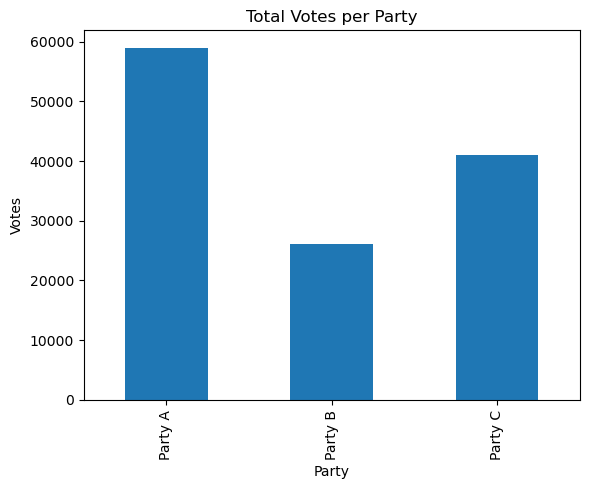

In [6]:
import matplotlib.pyplot as plt

total_votes_by_party.plot(kind='bar', title="Total Votes per Party")
plt.ylabel("Votes")
plt.show()
